In [1]:
### This script compare the grofiler result between the cell specific gene and common architecture genes
### First, we do a DAVID analysis on context specific genes
### Next, we compare the overlap between top GO terms and their p-vals

### Author:Yiyun
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib_venn import venn2, venn2_circles
import numpy as np
import seaborn as sns

***Top 100 GO terms p-value compare***

In [30]:
### READ go results
df_target = pd.read_csv('target_gores.csv')
df_predictor = pd.read_csv('predictor_gores.csv')

In [31]:
### Get top100 p-val and terms
n = 100
df_target_top = df_target.sort_values('p_value').head(n)
df_predictor_top = df_predictor.sort_values('p_value').head(n)

In [32]:
### Term intersection - find common terms in top100 lists
# between target and predictor only
common_termname_target_pre = list(set(df_target_top['term_name']).intersection(df_predictor_top['term_name']))
common_termid_target_pre = list(set(df_target_top['term_id']).intersection(df_predictor_top['term_id']))

In [33]:
len(common_termname_target_pre) # Number of overlapped termes in target and predictor only

44

In [34]:
###Construct dataframe of target and predictor only-- log10 p-vals of common terms
df_target_top_common = df_target_top[df_target_top['term_name']\
            .isin(common_termname_target_pre)][['term_id','term_name','p_value','intersection_size']]\
            .set_index('term_id').add_suffix('_target')
df_predictor_top_common = df_predictor_top[df_predictor_top['term_name']\
            .isin(common_termname_target_pre)][['term_id','term_name','p_value','intersection_size']]\
            .set_index('term_id').add_suffix('_predictor')
df_combine = pd.concat([df_target_top_common,df_predictor_top_common],axis = 1)

# Log10 transformation
df_combine['p_value_target'] = -np.log10(df_combine['p_value_target'])
df_combine['p_value_predictor'] = -np.log10(df_combine['p_value_predictor'])

intracellular
intracellular organelle
cellular metabolic process
organelle
cell cycle process
mitotic cell cycle process
cytoplasm
regulation of cell cycle
cellular component organization
protein binding
cellular component organization or biogenesis


/Users/stella/miniconda3/envs/cnp/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The set_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0.98, 'Residual plot of common GO term p-values of target-only and predictor only GO analysis')

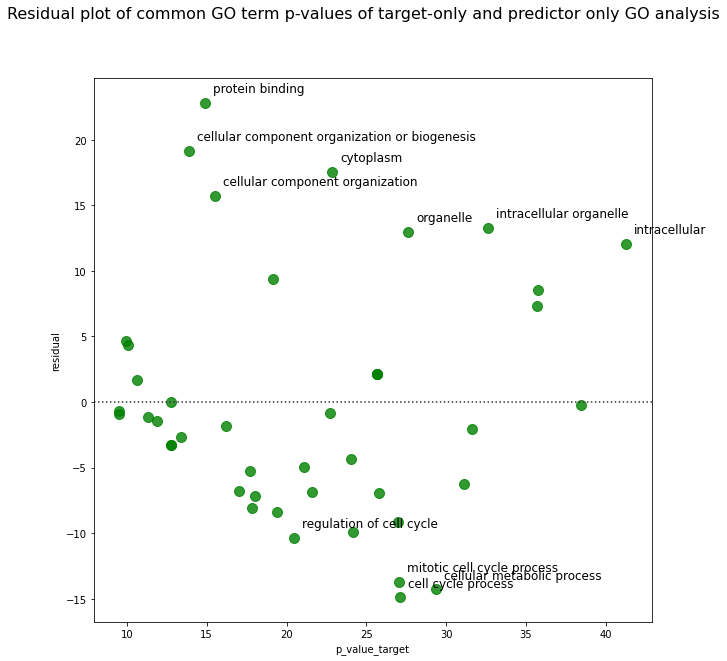

In [35]:
# Plot scatter(regression plot) and residual plot
fig, axs = plt.subplots(1,1, figsize = (10,10))
#axs[0] = sns.regplot(x='p_value_target', y='p_value_predictor',data =df_combine, ax = axs[0])
axs = sns.residplot(x='p_value_target', y='p_value_predictor', data =df_combine, color="g",scatter_kws={"s": 100},ax = axs)
axs.set_ylabel('residual')

# Get x, y position in residual plot for annotating -https://stackoverflow.com/questions/32213889/get-positions-of-points-in-pathcollection-created-by-scatter
text = df_combine['term_name_target'] # terms for annotation
offset = axs.collections[0]
offset.set_offset_position('data')
datapos = offset.get_offsets()

for i in range(len(datapos)):
    xval = datapos[i][0];yval = datapos[i][1]
    if yval > 10 or yval < -10:
        # Find the term corresponding to the position
        termname = df_combine[df_combine['p_value_target'] == xval]['term_name_target'].values[0]
        print(termname)
        axs.annotate(termname, (xval+ 0.5, yval +0.8), fontsize=12)

fig.suptitle('Residual plot of common GO term p-values of target-only and predictor only GO analysis', fontsize=16)
# intracellular
# intracellular membrane-bounded organelle
# membrane-bounded organelle
# intracellular organelle
# cellular metabolic process
# organelle
# cell cycle process
# mitotic cell cycle process
# cytoplasm
# organelle organization
# cellular component organization
# protein binding
# cellular component organization or biogenesis

***Test for dummy values***

In [53]:
# Specific terms
predict_only_term_id = df_predictor_top[~df_predictor_top['term_id'].isin(common_termid_target_pre)]['term_id']
target_only_term_id = df_target_top[~df_target_top['term_id'].isin(common_termid_target_pre)]['term_id']
# Union of terms
union_termname_target_pre = list(set(df_target_top['term_name'].tolist()+df_predictor_top['term_name'].tolist()))
# the lowest p-val in each list 
predictor_min = max(df_predictor_top['p_value'])
target_min = max(df_target_top['p_value'])

In [54]:
len(common_termname_target_pre) # Number of overlapped termes in target and predictor only

44

In [55]:
len(union_termname_target_pre)# Number of union terms

156

In [56]:
### Identify terms that are in union but not in target/predictor
target_termname = df_target_top['term_name'].tolist()
predictor_termname = df_predictor_top['term_name'].tolist()

target_toadd = [i for i in union_termname_target_pre if i not in target_termname]
predictor_toadd = [i for i in union_termname_target_pre if i not in predictor_termname]

In [62]:
### Generate dataframes that contain dummy values, using the least significant p-values
df_target_dummy = pd.DataFrame(columns = ['p_value','term_name'])
df_target_dummy['term_name'] = target_toadd
df_target_dummy['p_value'] = target_min

df_predictor_dummy = pd.DataFrame(columns = ['p_value','term_name'])
df_predictor_dummy['term_name'] = predictor_toadd
df_predictor_dummy['p_value'] = predictor_min

# Combine the dummy value dataframe
df_target_combine = pd.concat([df_target_top[['p_value','term_name']], df_target_dummy],axis = 0)
df_predictor_combine = pd.concat([df_predictor_top[['p_value','term_name']], df_predictor_dummy],axis = 0)
df_target_combine = df_target_combine.set_index('term_name').add_suffix('_target')
df_predictor_combine = df_predictor_combine.set_index('term_name').add_suffix('_predictor')

# Combine target and predictor dataframes
df_combine_dummy = pd.concat([df_target_combine,df_predictor_combine],axis = 1)

In [63]:
# Log10 transformation
df_combine_dummy['p_value_target'] = -np.log10(df_combine_dummy['p_value_target'])
df_combine_dummy['p_value_predictor'] = -np.log10(df_combine_dummy['p_value_predictor'])

intracellular
intracellular membrane-bounded organelle
membrane-bounded organelle
intracellular organelle
cellular metabolic process
organelle
cell cycle process
mitotic cell cycle process
cytoplasm
organelle organization
cellular component organization
protein binding
cellular component organization or biogenesis


/Users/stella/miniconda3/envs/cnp/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The set_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


Text(0.5, 0.98, 'Top 100 GO term p-values of target-only and predictor only GO analysis - with dummy values')

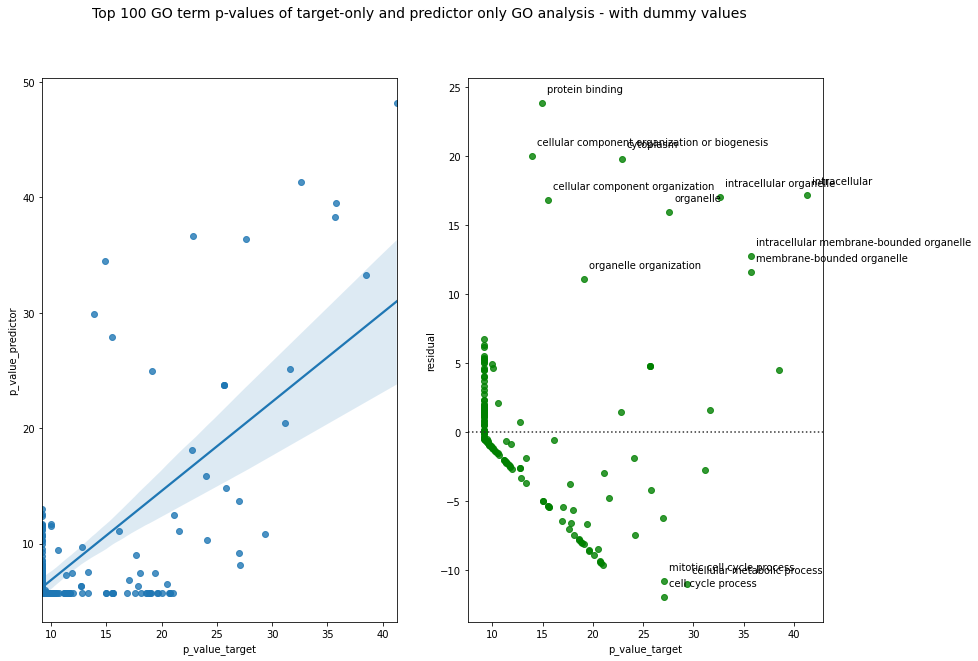

In [65]:
# Plot scatter(regression plot) and residual plot
fig, axs = plt.subplots(1,2, figsize = (14,10))
axs[0] = sns.regplot(x='p_value_target', y='p_value_predictor',data =df_combine_dummy, ax = axs[0])
axs[1] = sns.residplot(x='p_value_target', y='p_value_predictor', data =df_combine_dummy, color="g", ax = axs[1])
axs[1].set_ylabel('residual');
# Get x, y position in residual plot for annotating -https://stackoverflow.com/questions/32213889/get-positions-of-points-in-pathcollection-created-by-scatter
text = df_combine_dummy.index.tolist() # terms for annotation
offset = axs[1].collections[0]
offset.set_offset_position('data')
datapos = offset.get_offsets()

for i in range(len(datapos)):
    xval = datapos[i][0];yval = datapos[i][1]
    if yval > 10 or yval< -10:
        # Find the term corresponding to the position
        termname = df_combine_dummy[df_combine_dummy['p_value_target'] == xval].index.values[0]
        print(termname)
        axs[1].annotate(termname, (xval+ 0.5, yval +0.8))
        
fig.suptitle('Top 100 GO term p-values of target-only and predictor only GO analysis - with dummy values', fontsize=14)

Most of the p-vals fall in diagnol. We are not really doing a regression here, but visualizing the residuals allow us to see how the true value of predictor/target only deviates from their 'linear regressed' expectation. Therefore I chose an arbitrary threshole of +-10. 

For common terms between target and predictor only, the terms that shift the ranking towards the higher end (observed -log10p > predicted -log10p , observed p < predicted p )are organization or biogenesis terms， and the one shift to a lower end a cell cycle and metabolic terms.

***Next, we send the common terms, target specific terms and All gene specific terms for Revigo analysis to identify the most redundant, general terms in each group***

In [163]:
len(common_termid_predonly) #64 overlapped terms in top100

64

In [168]:
# ### Specific term name
# target_only_term_name = df_target_top[~df_target_top['term_name'].isin(common_termname)]['term_name']
# all_only_term_name = df_all_top[~df_all_top['term_name'].isin(common_termname)]['term_name']
# target_only_term_id = df_target_top[~df_target_top['term_id'].isin(common_termid)]['term_id']
# all_only_term_id = df_all_top[~df_all_top['term_id'].isin(common_termid)]['term_id']

predict_only_term_id = df_predictor_top[~df_predictor_top['term_id'].isin(common_termid_target_pre)]['term_id']
target_only_term_id = df_target_top[~df_target_top['term_id'].isin(common_termid_target_pre)]['term_id']

Below are the code for generating term lists as input in the website

In [169]:
# Target and predictor only
for idx in common_termid_target_pre: #print common id
    print(idx)

GO:0031981
GO:0051301
GO:0043232
GO:0007049
GO:0070013
GO:0022402
GO:0005634
GO:0005737
GO:1903047
GO:1901564
GO:0043231
GO:0044770
GO:0044267
GO:0071840
GO:0005654
GO:0032991
GO:0033554
GO:0000278
GO:1902494
GO:0043229
GO:0006807
GO:0140535
GO:1901265
GO:0016043
GO:0140513
GO:0005829
GO:0043233
GO:0019538
GO:0005515
GO:0016032
GO:0043933
GO:0005622
GO:0000166
GO:0043226
GO:0044237
GO:0022607
GO:0043227
GO:0044085
GO:0043228
GO:0031974
GO:0006996


In [170]:
for idx in predict_only_term_id: #print common id
    print(idx)

GO:0051641
GO:0008104
GO:0005743
GO:0033036
GO:0070161
GO:0005739
GO:0005925
GO:0030055
GO:0098798
GO:0005740
GO:0048522
GO:0031967
GO:0031975
GO:0019866
GO:0031966
GO:0070727
GO:1990904
GO:0034613
GO:0046907
GO:0043624
GO:0035639
GO:0035556
GO:0051179
GO:0044391
GO:0032543
GO:0017076
GO:0032555
GO:0140053
GO:0032984
GO:0048518
GO:0005488
GO:0032553
GO:0005840
GO:0045184
GO:0005759
GO:0044093
GO:0051649
GO:0033043
GO:0009057
GO:0022411
GO:0044877
GO:0031090
GO:0019899
GO:0043168
GO:0044265
GO:0043604
GO:0007005
GO:0071705
GO:0070126
GO:0050790
GO:0007010
GO:0006415
GO:0006974
GO:0010604
GO:0015935
GO:0010638
GO:0015031
GO:0051668
GO:0006412


In [164]:
for idx in target_only_term_id: #print common id
    print(idx)

GO:0008152
GO:1901576
GO:0009058
GO:0044238
GO:0006139
GO:0044249
GO:0046483
GO:1901360
GO:0051726
GO:0010564
GO:0034641
GO:0006725
GO:0003824
GO:0071704
GO:0044271
GO:0044772
GO:1901362
GO:0044260
GO:0006793
GO:0006796
GO:0051276
GO:1990234
GO:0034654
GO:0018130
GO:0080090
GO:0019438
GO:2000142
GO:1901987
GO:0019222
GO:0055086
GO:0031323
GO:0060260
GO:0010033
GO:0016740
GO:0009165
GO:0140014
GO:0009719
GO:1901293
GO:0090304
GO:0009628
GO:0043170
GO:0019693
GO:0034645
GO:0009117
GO:0031325
GO:0036211
GO:0006464
GO:0065003
GO:0090407
GO:0046390
GO:0009059
GO:0006352
GO:0006753
GO:0051246
GO:0051171
GO:0006367
GO:0009893
GO:0000819
GO:0019637
